In [1]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
# Connect database
conn = psycopg2.connect(
    host=os.getenv('DB_HOST'),
    database=os.getenv('DB_NAME'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    port=os.getenv('DB_PORT')
)

In [3]:
# Check what securities are available
securities = pd.read_sql("SELECT * FROM securities LIMIT 10", conn)
securities

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_6813/3255664848.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  securities = pd.read_sql("SELECT * FROM securities LIMIT 10", conn)


,ticker,company_name,sector,industry,market_cap,first_trade_date,last_trade_date,is_active,created_at,updated_at
0,CME,CME Group,Financials,Financial Exchanges & Data,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
1,CMS,CMS Energy,Utilities,Multi-Utilities,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
2,KO,Coca-Cola Company (The),Consumer Staples,Soft Drinks & Non-alcoholic Beverages,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
3,CTSH,Cognizant,Information Technology,IT Consulting & Other Services,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
4,COIN,Coinbase,Financials,Financial Exchanges & Data,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
5,CL,Colgate-Palmolive,Consumer Staples,Household Products,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
6,CMCSA,Comcast,Communication Services,Cable & Satellite,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
7,CAG,Conagra Brands,Consumer Staples,Packaged Foods & Meats,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
8,COP,ConocoPhillips,Energy,Oil & Gas Exploration & Production,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740
9,ED,Consolidated Edison,Utilities,Multi-Utilities,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-15 13:11:53.918740


In [4]:
# Check price data
query = """
    SELECT ticker, COUNT(*) AS num_days, MIN(date) as start_date, MAX(date) as end_date
    FROM daily_prices
    GROUP BY ticker
    ORDER BY ticker
"""
price_summary = pd.read_sql(query, conn)
price_summary

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_6813/266626155.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_summary = pd.read_sql(query, conn)


,ticker,num_days,start_date,end_date
0,A,1261,2021-02-08,2026-02-13
1,AAPL,1256,2021-02-16,2026-02-13
2,ABBV,1261,2021-02-08,2026-02-13
3,ABNB,1256,2021-02-16,2026-02-13
4,ABT,1261,2021-02-08,2026-02-13
...,...,...,...,...
95,MO,1256,2021-02-16,2026-02-13
96,SCHW,1256,2021-02-16,2026-02-13
97,T,1256,2021-02-16,2026-02-13
98,TECH,1256,2021-02-16,2026-02-13


In [5]:
# Check price data summary
query = """
        SELECT ticker, COUNT(*) as num_days, MIN(date) as start_date, MAX(date) as end_date
        FROM daily_prices
        GROUP BY ticker
        ORDER BY ticker \
        """
price_summary = pd.read_sql(query, conn)
print(price_summary)

# Check AAPL prices
query = """
        SELECT * FROM daily_prices
        WHERE ticker = 'AMD'
        ORDER BY date DESC
            LIMIT 100 \
        """
amd_prices = pd.read_sql(query, conn)
print(amd_prices)


/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_6813/3777755642.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_summary = pd.read_sql(query, conn)


   ticker  num_days  start_date    end_date
0       A      1261  2021-02-08  2026-02-13
1    AAPL      1256  2021-02-16  2026-02-13
2    ABBV      1261  2021-02-08  2026-02-13
3    ABNB      1256  2021-02-16  2026-02-13
4     ABT      1261  2021-02-08  2026-02-13
..    ...       ...         ...         ...
95     MO      1256  2021-02-16  2026-02-13
96   SCHW      1256  2021-02-16  2026-02-13
97      T      1256  2021-02-16  2026-02-13
98   TECH      1256  2021-02-16  2026-02-13
99    XYZ      1256  2021-02-16  2026-02-13

[100 rows x 4 columns]
       id ticker        date    open    high     low   close    volume  \
0   46432    AMD  2026-02-13  204.02  210.05  203.88  207.32  26088600   
1   46431    AMD  2026-02-12  215.83  218.46  205.14  205.94  32181000   
2   46430    AMD  2026-02-11  217.88  219.65  209.21  213.58  33384700   
3   46429    AMD  2026-02-10  215.14  219.39  213.13  213.57  25326700   
4   21338    AMD  2026-02-09  206.90  217.60  204.15  216.00  38810800   
..  

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_6813/3777755642.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amd_prices = pd.read_sql(query, conn)


/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_6813/3172215076.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amd = pd.read_sql(query, conn, index_col='date', parse_dates=['date'])


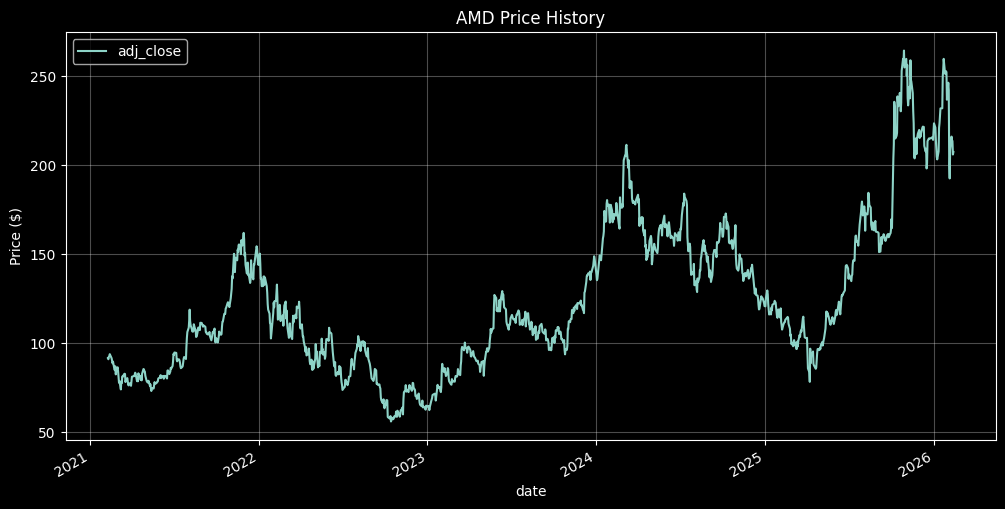

In [6]:
# Plot price history
import matplotlib.pyplot as plt

query = """
    SELECT date, adj_close FROM daily_prices
    WHERE ticker = 'AMD'
    ORDER BY date
"""
amd = pd.read_sql(query, conn, index_col='date', parse_dates=['date'])
amd.plot(figsize=(12, 6), title='AMD Price History')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()